In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update(
    {
        "font.family": "serif",
        "font.size": 18,
        "figure.dpi": 300,
    }
)
import seaborn as sns
import numpy as np
import json
from multiprocessing import Pool
from tqdm.auto import tqdm
import os
os.makedirs("plots", exist_ok=True)

/home/andrew/miniconda3/envs/syc/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[Jump here](#load_agg) to directly load our precomputed aggregate results (i.e. if you didn't run the experiment scripts)

In [2]:
# Load results (will take a few min for 500 iters)
# Skip to directly load df_agg below if you wish to use our precomputed results

def load_csv(path, load_weights=True):
    usecols = cols
    if load_weights:
        usecols.extend(["donor_ids", "cluster_weights", "bench_weights"])
    df_tmp = pd.read_csv(path, usecols=usecols)
    df_tmp["method"] = method
    return df_tmp


iters = 10 # paper uses 500
methods = ["ols", "ridge", "lasso"]
cols = [
    "target_id",
    "bench_test",
    "cluster_test",
    "donor_ids",
    "noise_level",
    "n_A",
    "n_B",
    "T",
    "iteration",
]
results_dir = "results"
df_results = []
for method in methods:
    paths = [f"{results_dir}/{method}/iteration_{i}.csv" for i in range(iters)]
    with Pool(5) as p: # increase num processes up to 2x cpu cores for speedup
        dfs_generator = p.imap_unordered(load_csv, paths)

        for df in tqdm(dfs_generator, total=len(paths), desc=f"Reading {method}"):
            df_results.append(df)

df_results = pd.concat(df_results, ignore_index=True)

Reading ols:   0%|          | 0/10 [00:00<?, ?it/s]

Reading lasso: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]


In [3]:
df_results

,target_id,bench_test,cluster_test,donor_ids,cluster_weights,bench_weights,noise_level,n_A,n_B,T,iteration,method
0,0,0.114161,0.039755,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",[[-3.15207521e+12 3.68208176e+11 -6.39642164e...,[[-4.39699636e+10 -2.45871449e+12 2.14963100e...,0.1,500,500,10,4,ols
1,1,0.029698,0.029960,"[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",[[ 2.61796188e+12 -3.28261050e+11 2.68948951e...,[[-3.55811194e+11 4.92258845e+10 -1.33803975e...,0.1,500,500,10,4,ols
2,2,0.307328,0.002852,"[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",[[-6.35113750e+12 5.09155432e+10 4.06722382e...,[[-2.78017723e+12 1.42929429e+12 -4.54164290e...,0.1,500,500,10,4,ols
3,3,1.453353,0.045661,"[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",[[ 1.86225038e+13 2.22711547e+12 -1.33240420e...,[[-9.99900229e+11 -2.97647494e+12 -4.36005958e...,0.1,500,500,10,4,ols
4,4,0.015090,0.007932,"[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",[[ 5.13332936e+12 -1.49281927e+12 -3.13369410e...,[[ 2.52327748e-03 2.95136297e-03 8.14787969e...,0.1,500,500,10,4,ols
...,...,...,...,...,...,...,...,...,...,...,...,...
94495,295,0.453394,0.374918,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15,...",[ 0. 0. 0. 0. ...,[ 0. 0. 0. ... -0. -0. -0.],0.4,1000,1000,10,9,lasso
94496,296,0.112147,0.083200,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15,...",[ 0. 0. 0. 0. ...,[ 0. 0. 0. ... -0. 0. -0.],0.4,1000,1000,10,9,lasso
94497,297,0.311526,0.030434,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15,...",[ 0. 0. 0. 0. ...,[ 0. 0. 0. ... -0. -0. 0.],0.4,1000,1000,10,9,lasso
94498,298,0.257772,0.042034,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15,...",[-0. 0. -0. 0. ...,[ 0. 0. -0. ... 0. -0. 0.],0.4,1000,1000,10,9,lasso


In [4]:
print("Number of iterations in results:", len(df_results["iteration"].unique()))

Number of iterations in results: 10


# SC vs ClusterSC

## Median Post-Intervention MSE

In [5]:
# Get median mse of results
id_vars = ["n_A", "n_B", "noise_level", "iteration", "method"]
value_vars = ["bench_test", "cluster_test"]
metric = "median"
df_agg = df_results.groupby(id_vars).agg({v: metric for v in value_vars}).reset_index()
# recommend saving df_agg to skip reprocessing results data

<a id="load_agg"></a>
**Load precomputed aggregate results below:**

In [2]:
df_agg = pd.read_csv("results/mse_medians.csv")

In [17]:
# rearrange data for plotting
df_melted = pd.melt(
    df_agg, id_vars=id_vars, value_vars=value_vars, var_name="type", value_name="mse"
)

# make label for plots
method_map = {"lasso": "SC (Lasso)", "ols": "SC (OLS)", "ridge": "SC (Ridge)"} 
df_melted["label"] = np.where(
    df_melted["type"] == "bench_test",
    df_melted["method"].map(method_map),
    "Cluster" + df_melted["method"].map(method_map),
)
df_melted["n"] = df_melted["n_A"] + df_melted["n_B"]

In [18]:
df_melted

,n_A,n_B,noise_level,iteration,method,type,mse,label,n
0,500,500,0.1,0,lasso,bench_test,0.009760,SC (Lasso),1000
1,500,500,0.1,0,ols,bench_test,0.016301,SC (OLS),1000
2,500,500,0.1,0,ridge,bench_test,0.015362,SC (Ridge),1000
3,500,500,0.1,1,lasso,bench_test,0.009933,SC (Lasso),1000
4,500,500,0.1,1,ols,bench_test,0.017135,SC (OLS),1000
...,...,...,...,...,...,...,...,...,...
41995,1000,1000,0.4,498,ols,cluster_test,0.352370,ClusterSC (OLS),2000
41996,1000,1000,0.4,498,ridge,cluster_test,0.245333,ClusterSC (Ridge),2000
41997,1000,1000,0.4,499,lasso,cluster_test,0.167904,ClusterSC (Lasso),2000
41998,1000,1000,0.4,499,ols,cluster_test,0.206883,ClusterSC (OLS),2000


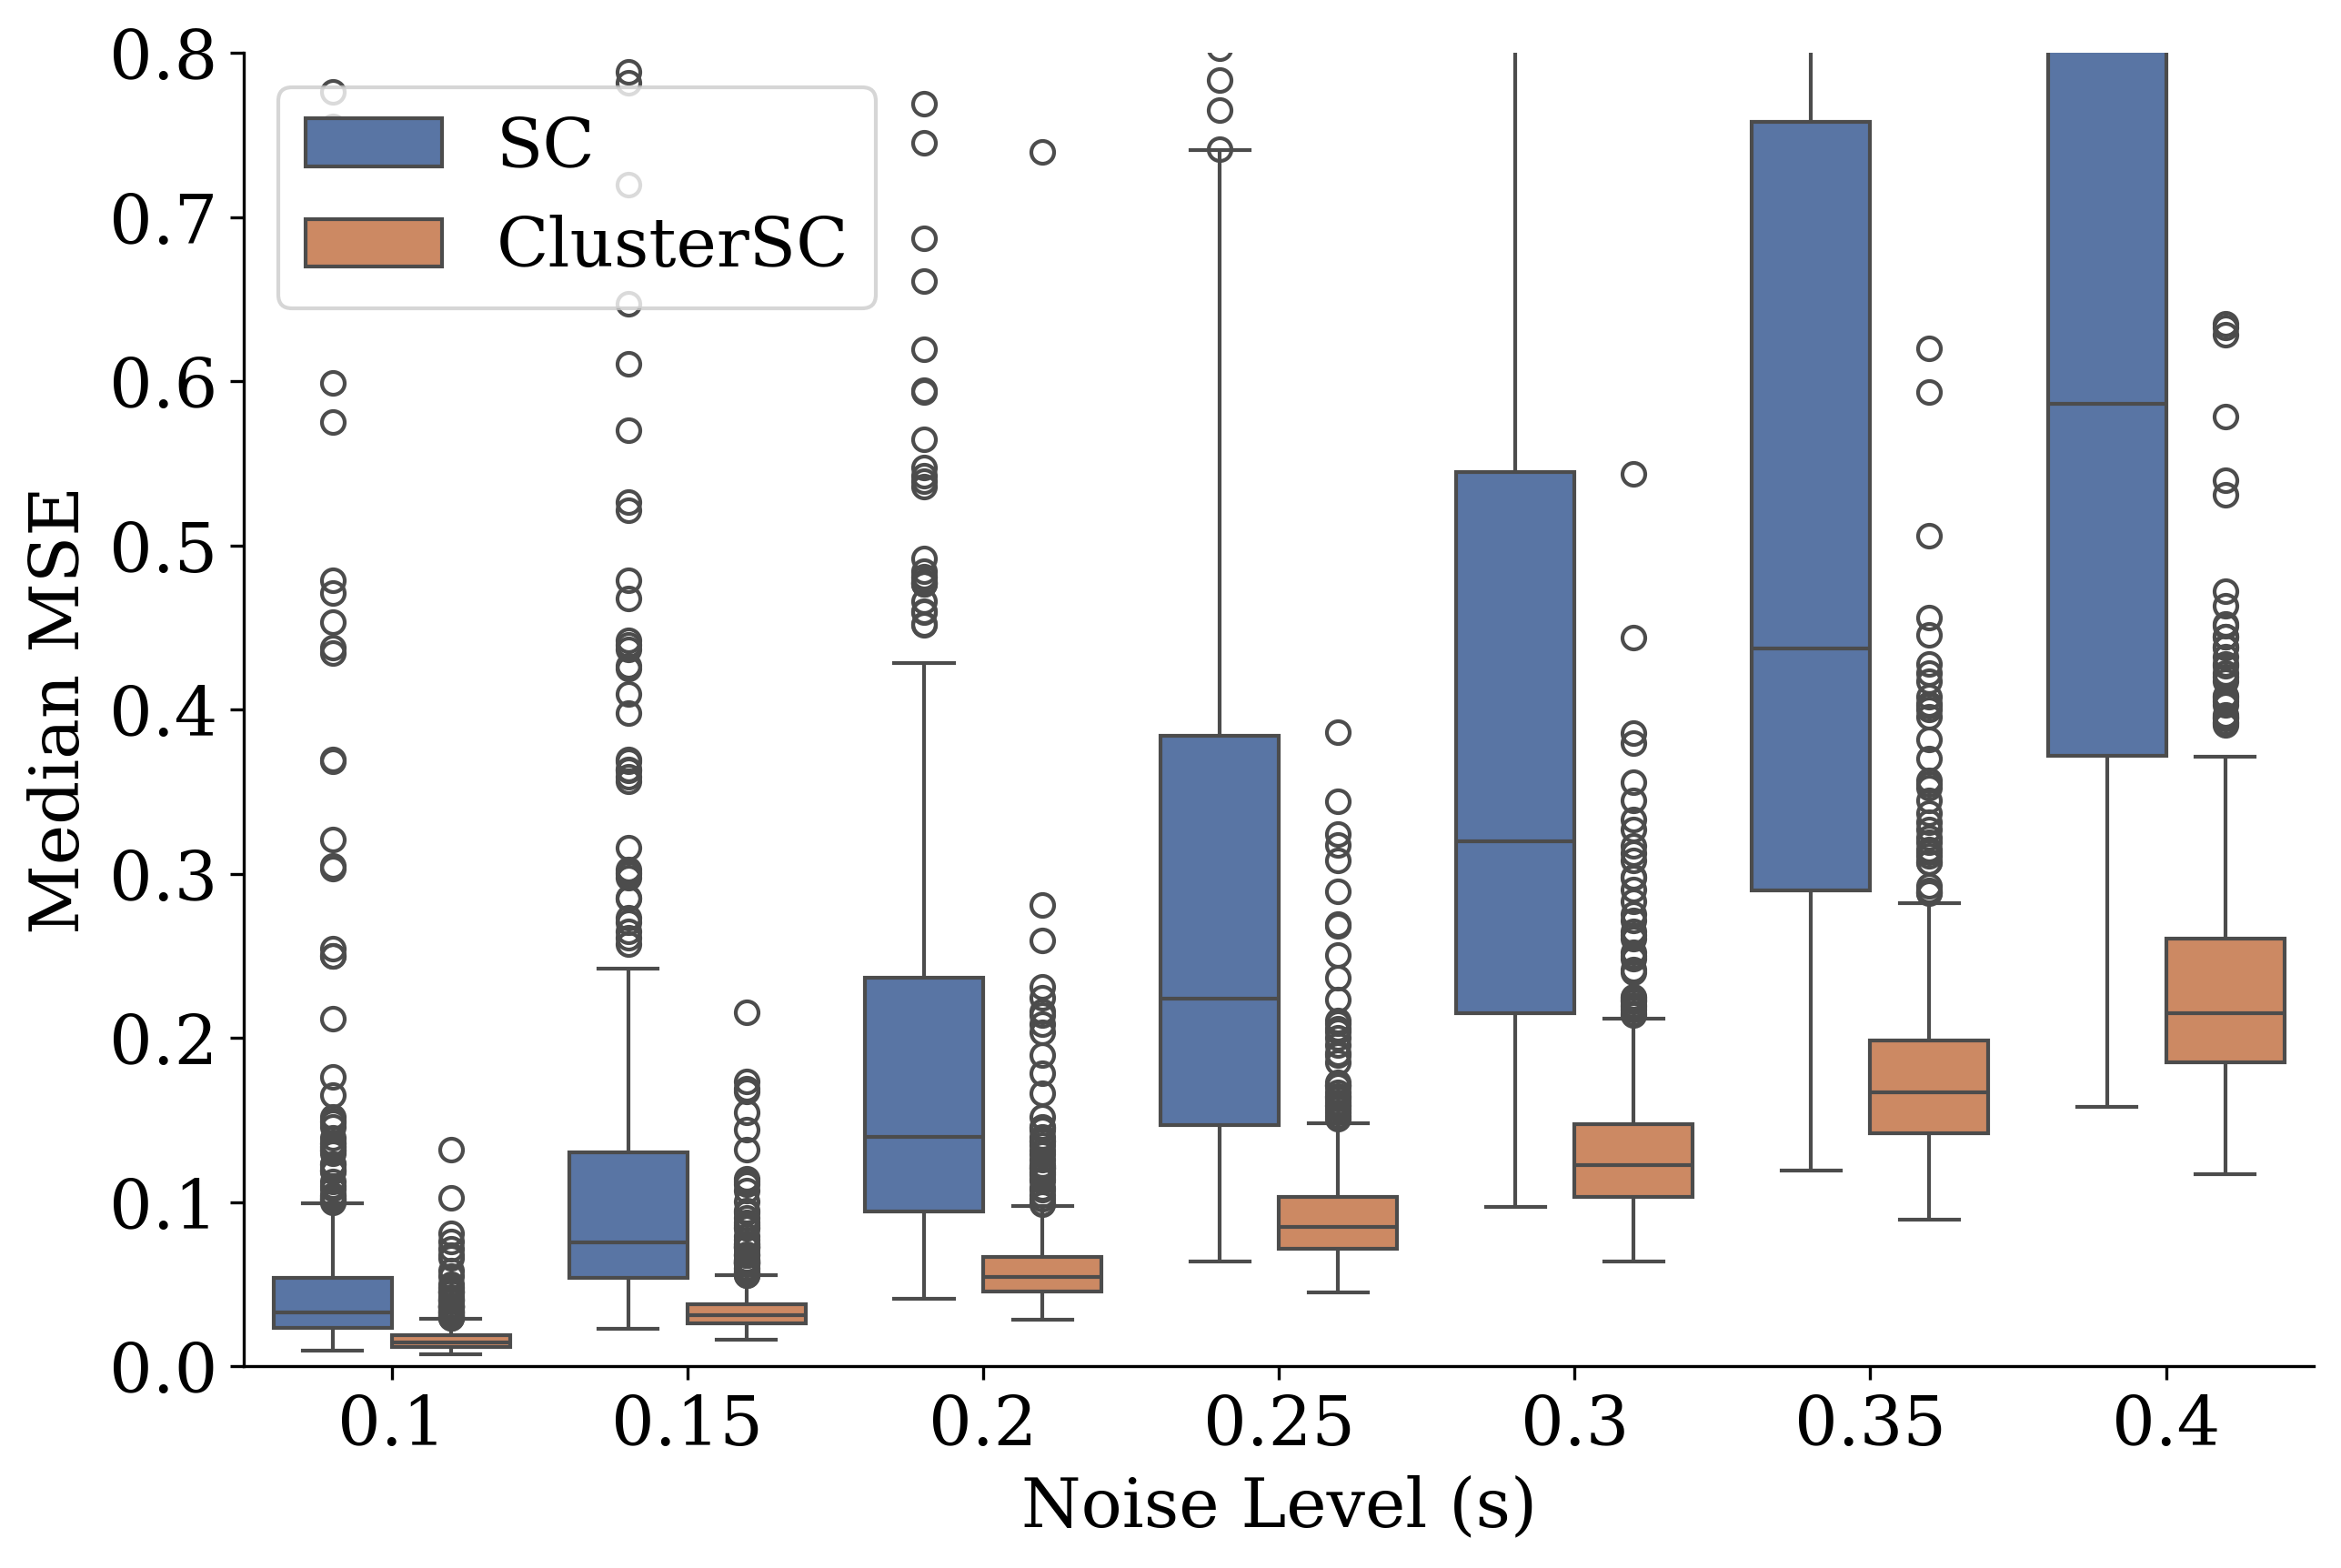

In [26]:
# SC vs ClusterSC plot (uses Ridge under the hood)
data = df_melted[(df_melted["n"] == 1000) & (df_melted["method"] == "ridge")].copy()
data["label"] = data["label"].map({"SC (Ridge)": "SC", "ClusterSC (Ridge)": "ClusterSC"})
g = sns.FacetGrid(data, height=6, aspect=1.5, sharey=True, margin_titles=True)
g.map_dataframe(sns.boxplot, x="noise_level", hue="label", y="mse", palette="deep")
# g.add_legend()
g.set_axis_labels("Noise Level (s)", "Median MSE")
g.set(ylim=(0, 0.8))
for ax in g.axes.flatten():
    ax.legend()
    break
plt.savefig("plots/mse_ridge")
plt.show()

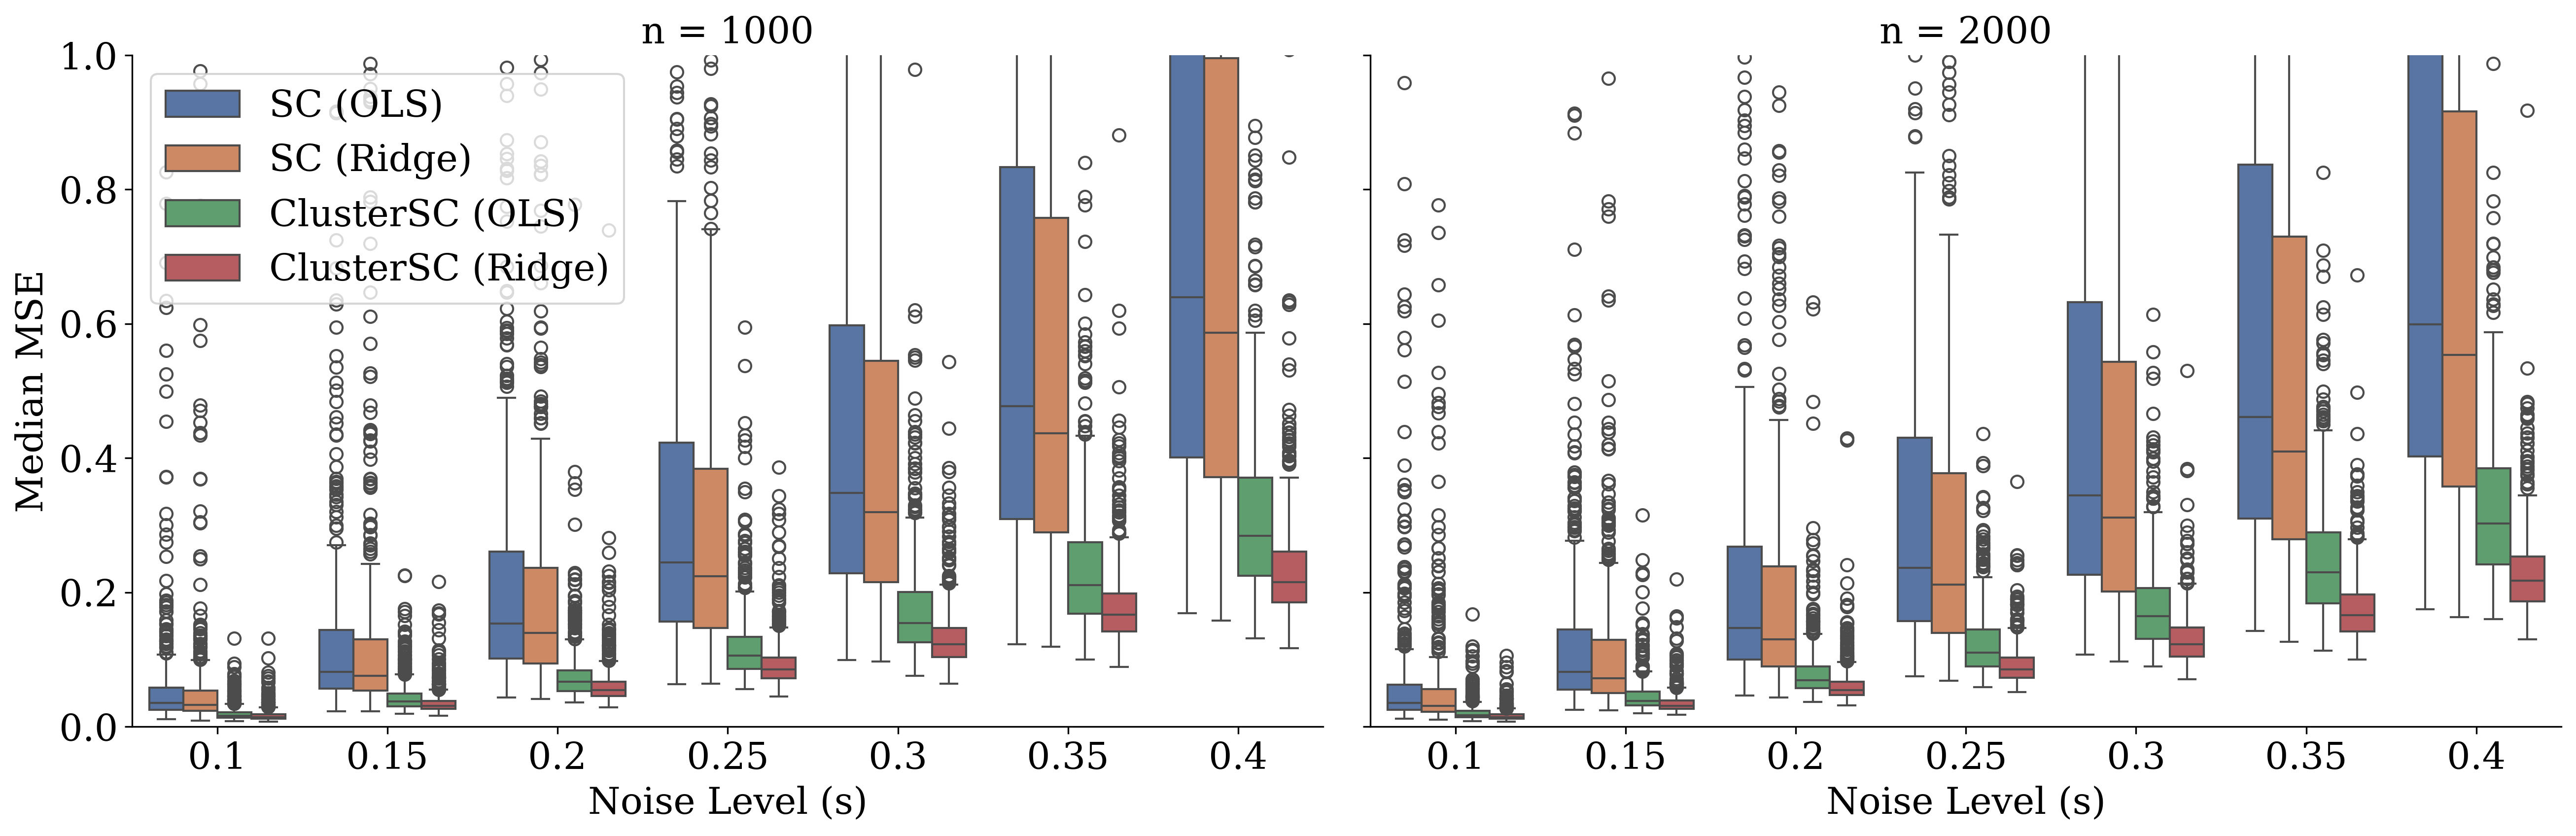

In [27]:
# More detailed SC vs ClusterSC plot (in appendix)
data = df_melted[(df_melted["method"].isin(["ridge", "ols"]))].copy()
g = sns.FacetGrid(data, col="n", height=6, aspect=1.5, sharey=True, margin_titles=True)
g.map_dataframe(sns.boxplot, x="noise_level", hue="label", y="mse", palette="deep")
# g.add_legend()
g.set_axis_labels("Noise Level (s)", "Median MSE")
g.set(ylim=(0, 1))
for ax in g.axes.flatten():
    ax.legend(loc="upper left")
    break
plt.savefig("plots/mse_ols_ridge")
plt.show()

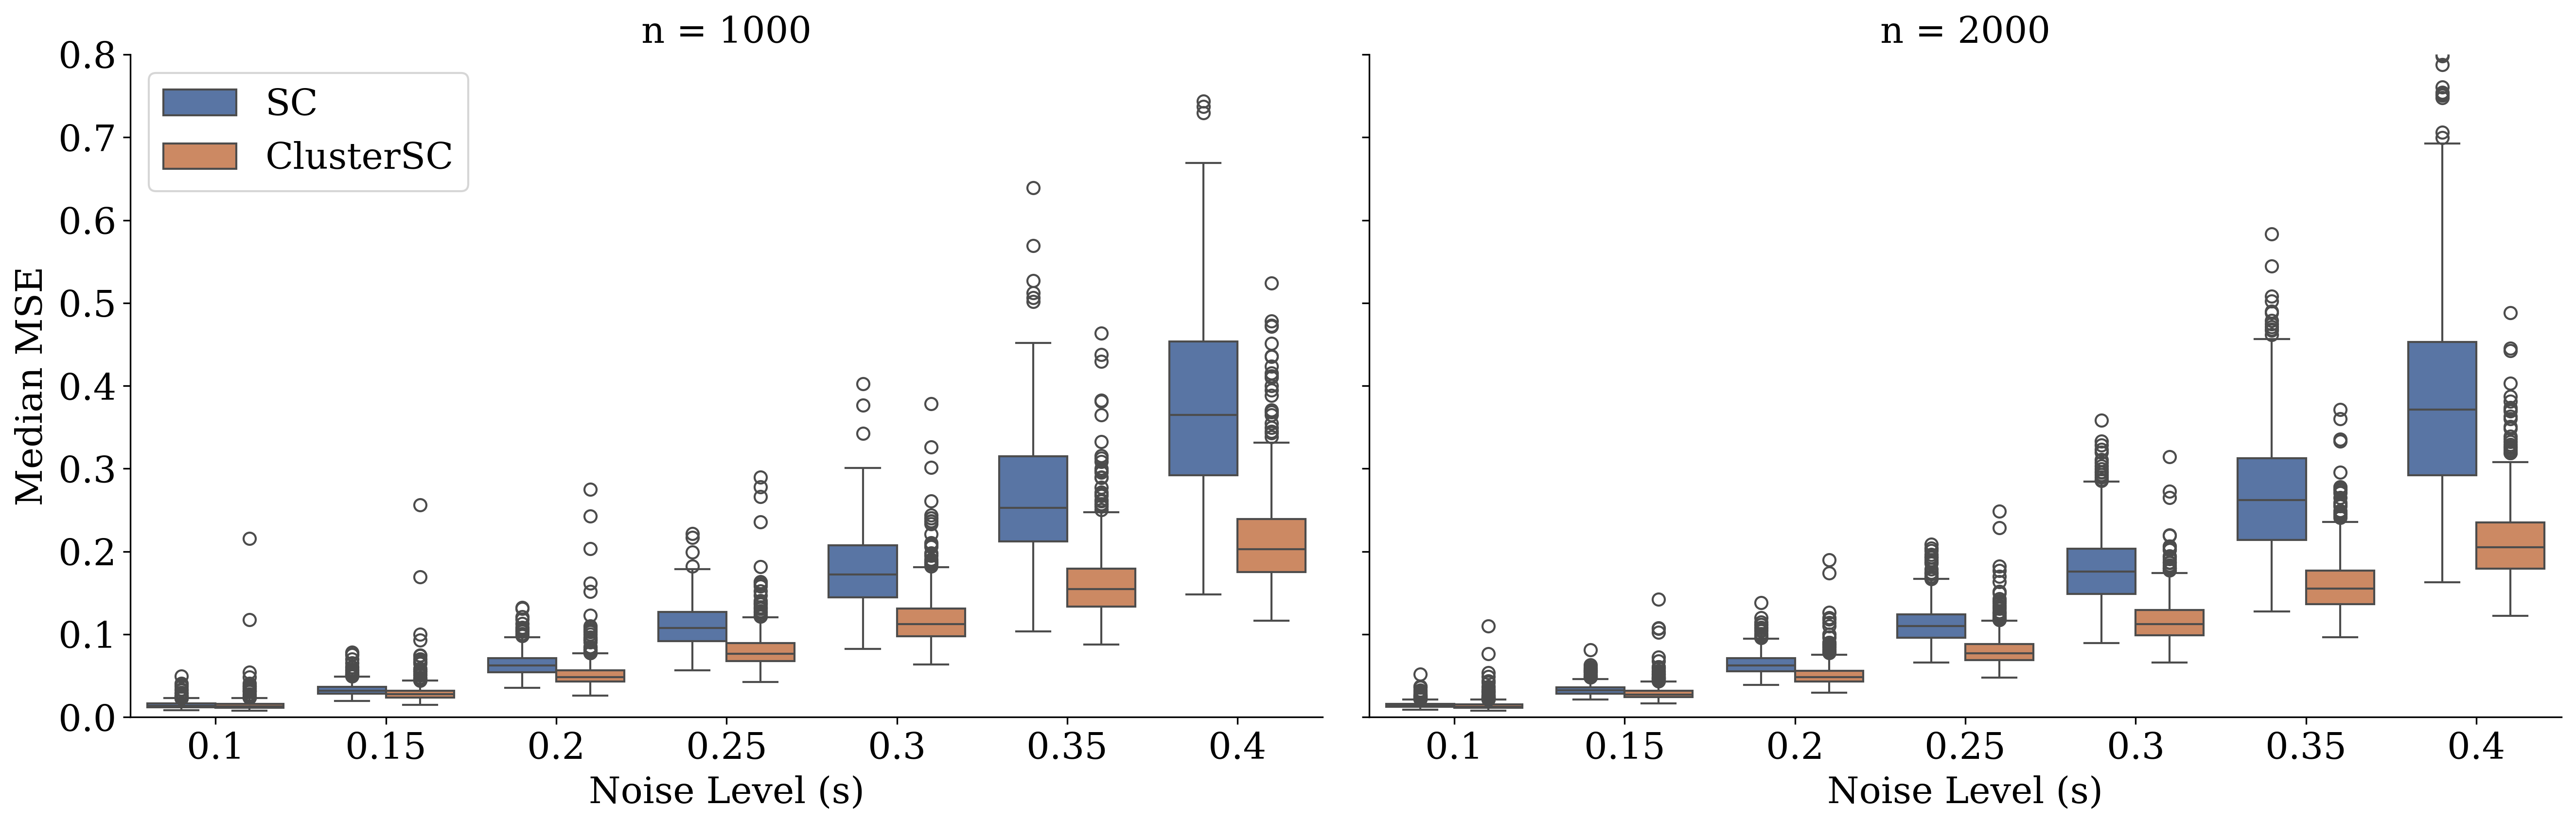

In [ ]:
# SC vs ClusterSC with Lasso (in appendix)
data = df_melted[(df_melted["method"] == "lasso")].copy()
data['label'] = data['label'].map({"SC (Lasso)": "SC", "ClusterSC (Lasso)": "ClusterSC"})
g = sns.FacetGrid(data, col="n", height=6, aspect=1.5, sharey=True, margin_titles=True)
g.map_dataframe(sns.boxplot, x="noise_level", hue="label", y="mse", palette="deep")
# g.add_legend()
g.set_axis_labels("Noise Level (s)", "Median MSE")
g.set(ylim=(0, 0.8))
for ax in g.axes.flatten():
    ax.legend()
    break
plt.savefig("plots/mse_lasso")
plt.show()

## Pairwise MSE improvement $I_i$ median

In [6]:
id_vars

['n_A', 'n_B', 'noise_level', 'iteration', 'method']

In [31]:
df_results["improvement"] = df_results["bench_test"] - df_results["cluster_test"]
df_agg2 = (
    df_results.groupby(id_vars).agg(improvement=("improvement", "median")).reset_index()
)

In [32]:
df_agg2 = pd.read_csv("results/improvement_medians.csv", index_col=0)

In [33]:
df_agg2["n"] = df_agg2["n_A"] + df_agg2["n_B"]
df_agg2

,n_A,n_B,noise_level,iteration,method,improvement,n
0,500,500,0.1,0,lasso,0.000994,1000
1,500,500,0.1,0,ols,0.001800,1000
2,500,500,0.1,0,ridge,0.004318,1000
3,500,500,0.1,1,lasso,0.000047,1000
4,500,500,0.1,1,ols,0.005470,1000
...,...,...,...,...,...,...,...
20995,1000,1000,0.4,498,ols,0.334866,2000
20996,1000,1000,0.4,498,ridge,0.305579,2000
20997,1000,1000,0.4,499,lasso,0.114629,2000
20998,1000,1000,0.4,499,ols,0.200225,2000


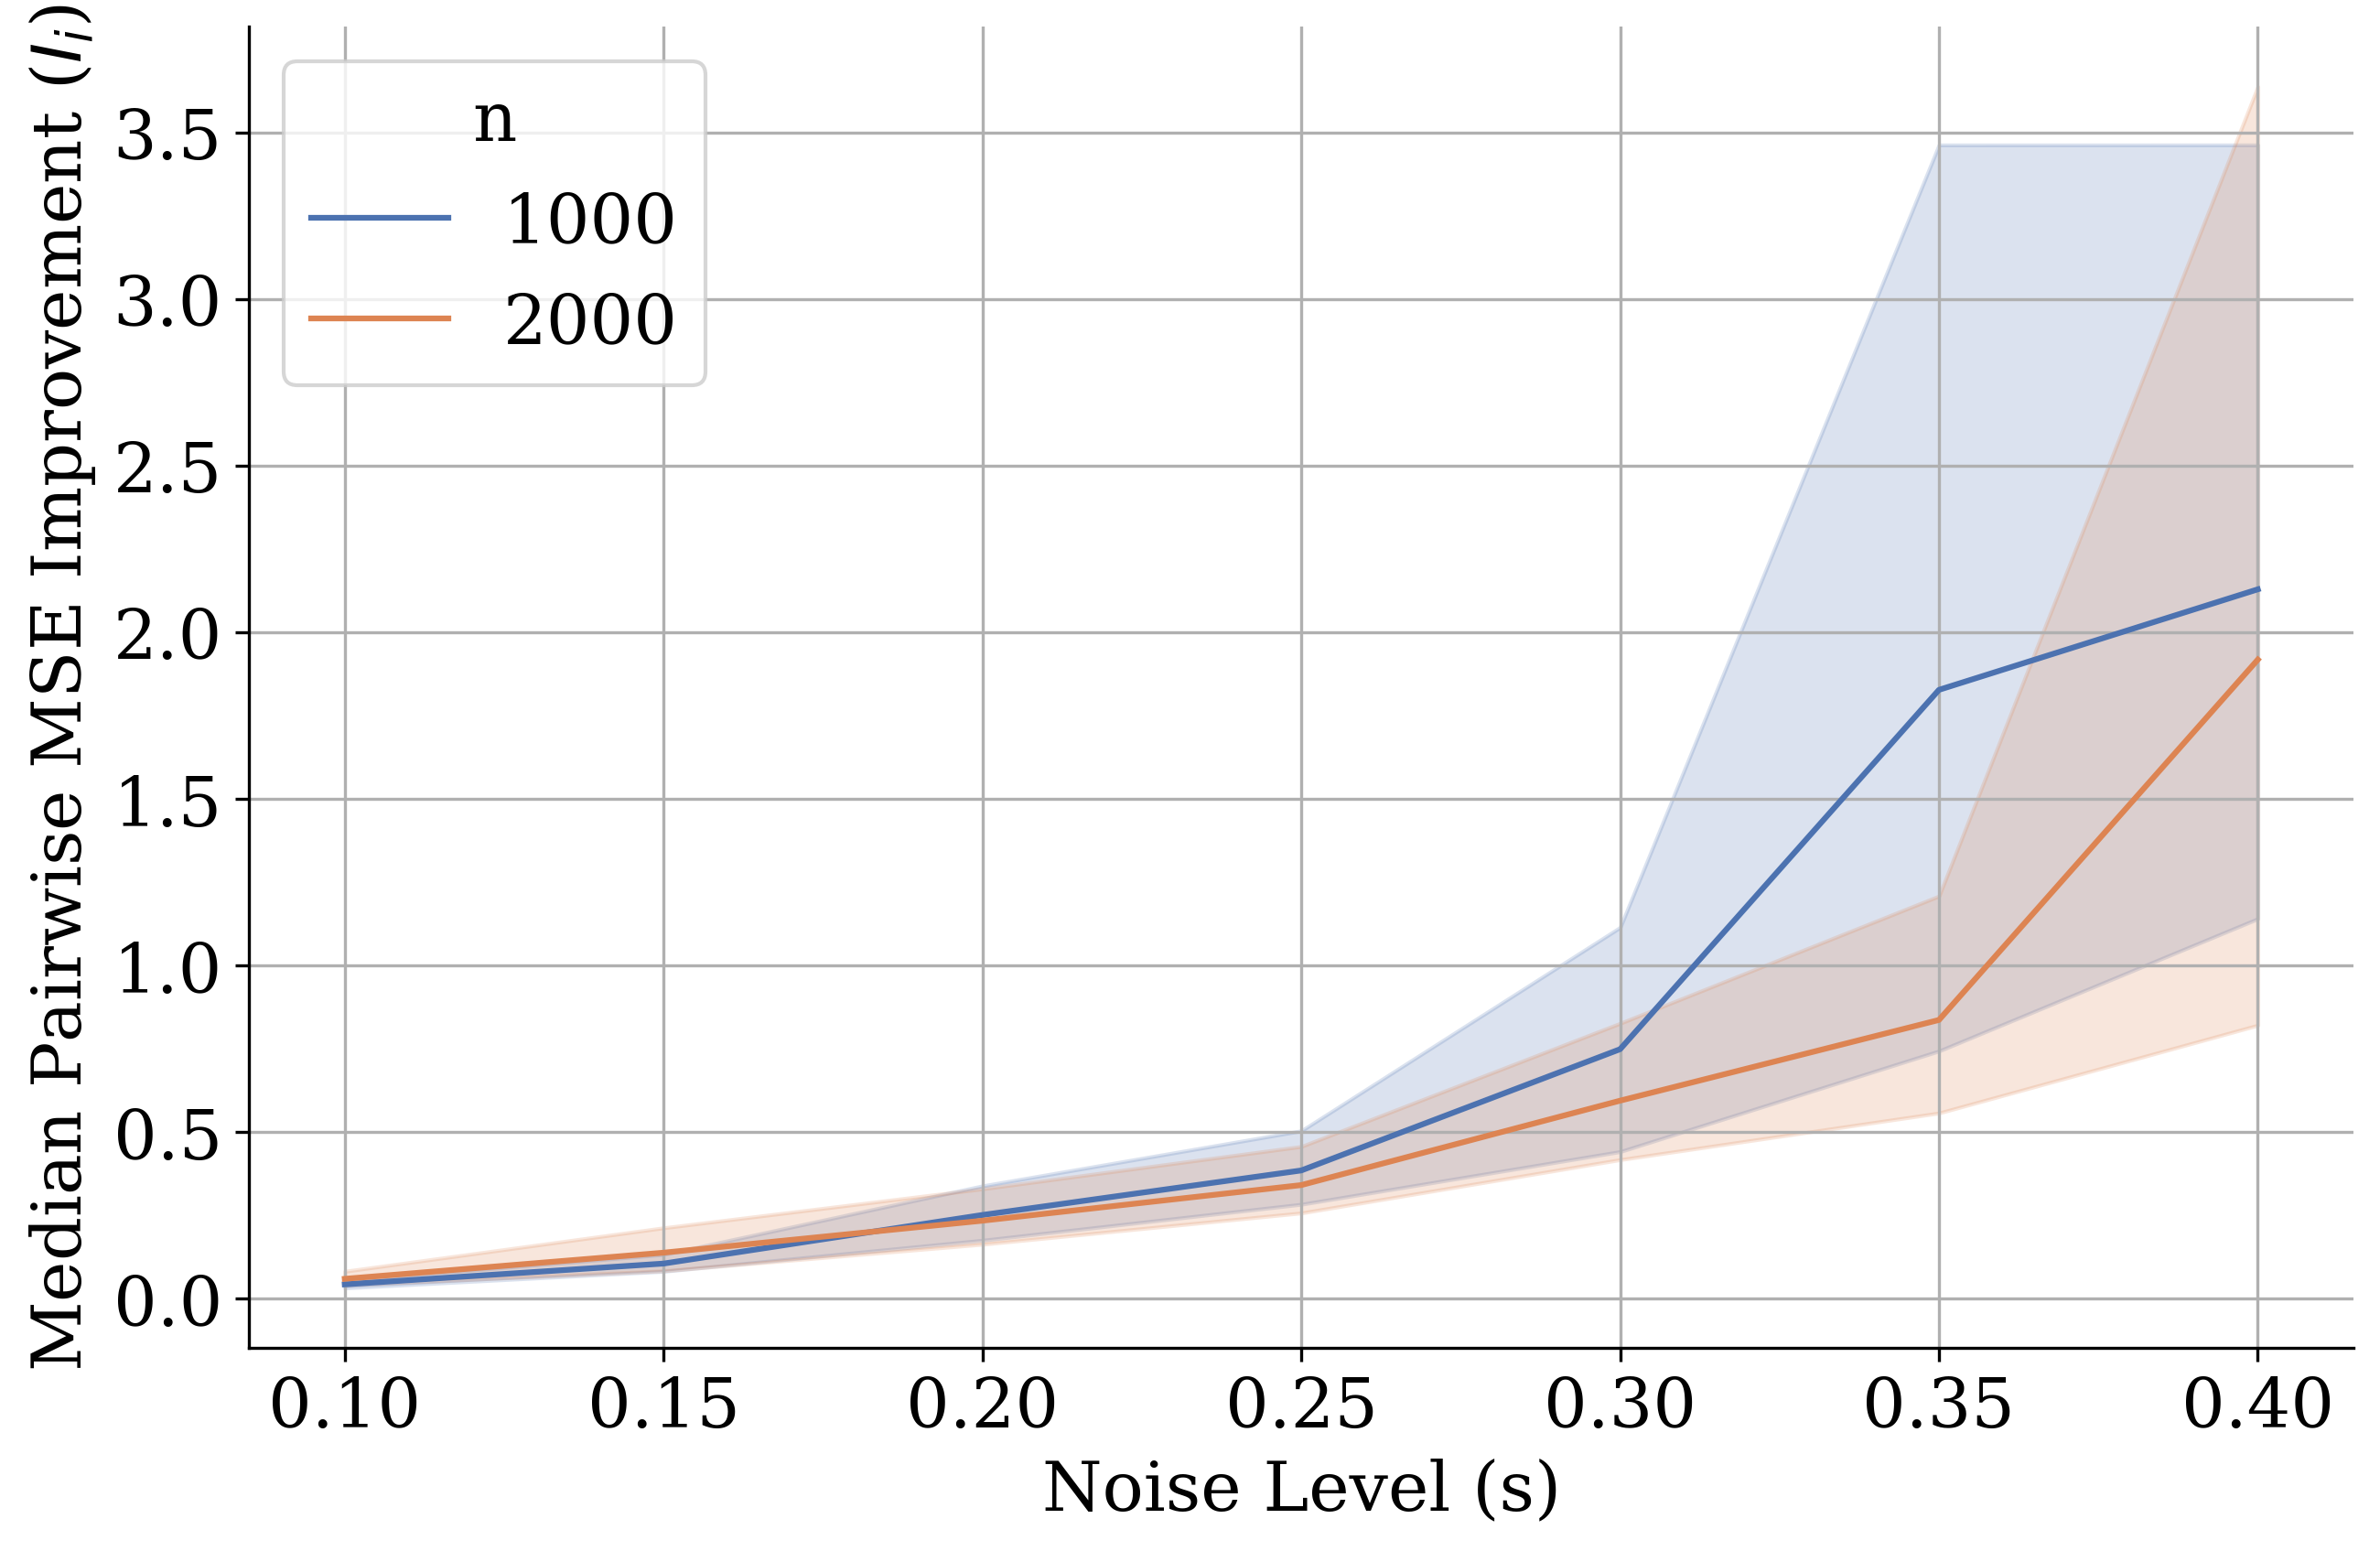

In [35]:
# Pairwise improvement plot for Ridge
data = df_agg2[df_agg2["method"] == "ridge"]
g = sns.FacetGrid(data, height=6, aspect=1.5, margin_titles=False, sharey=False)
g.map_dataframe(
    sns.lineplot,
    x="noise_level",
    hue="n",
    y="improvement",
    palette="deep",
)
for i, ax in enumerate(g.axes.flatten()):
    if i == 0:
        ax.legend(title="n")
    ax.set_ylabel("Median Pairwise MSE Improvement ($I_i$)")
    ax.set_xlabel("Noise Level (s)")

plt.grid(True)
plt.savefig("plots/improvement_ridge")
plt.show()

/tmp/ipykernel_1560/2971585174.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["method"] = data["method"].map({"ols": "OLS", "ridge": "Ridge"})


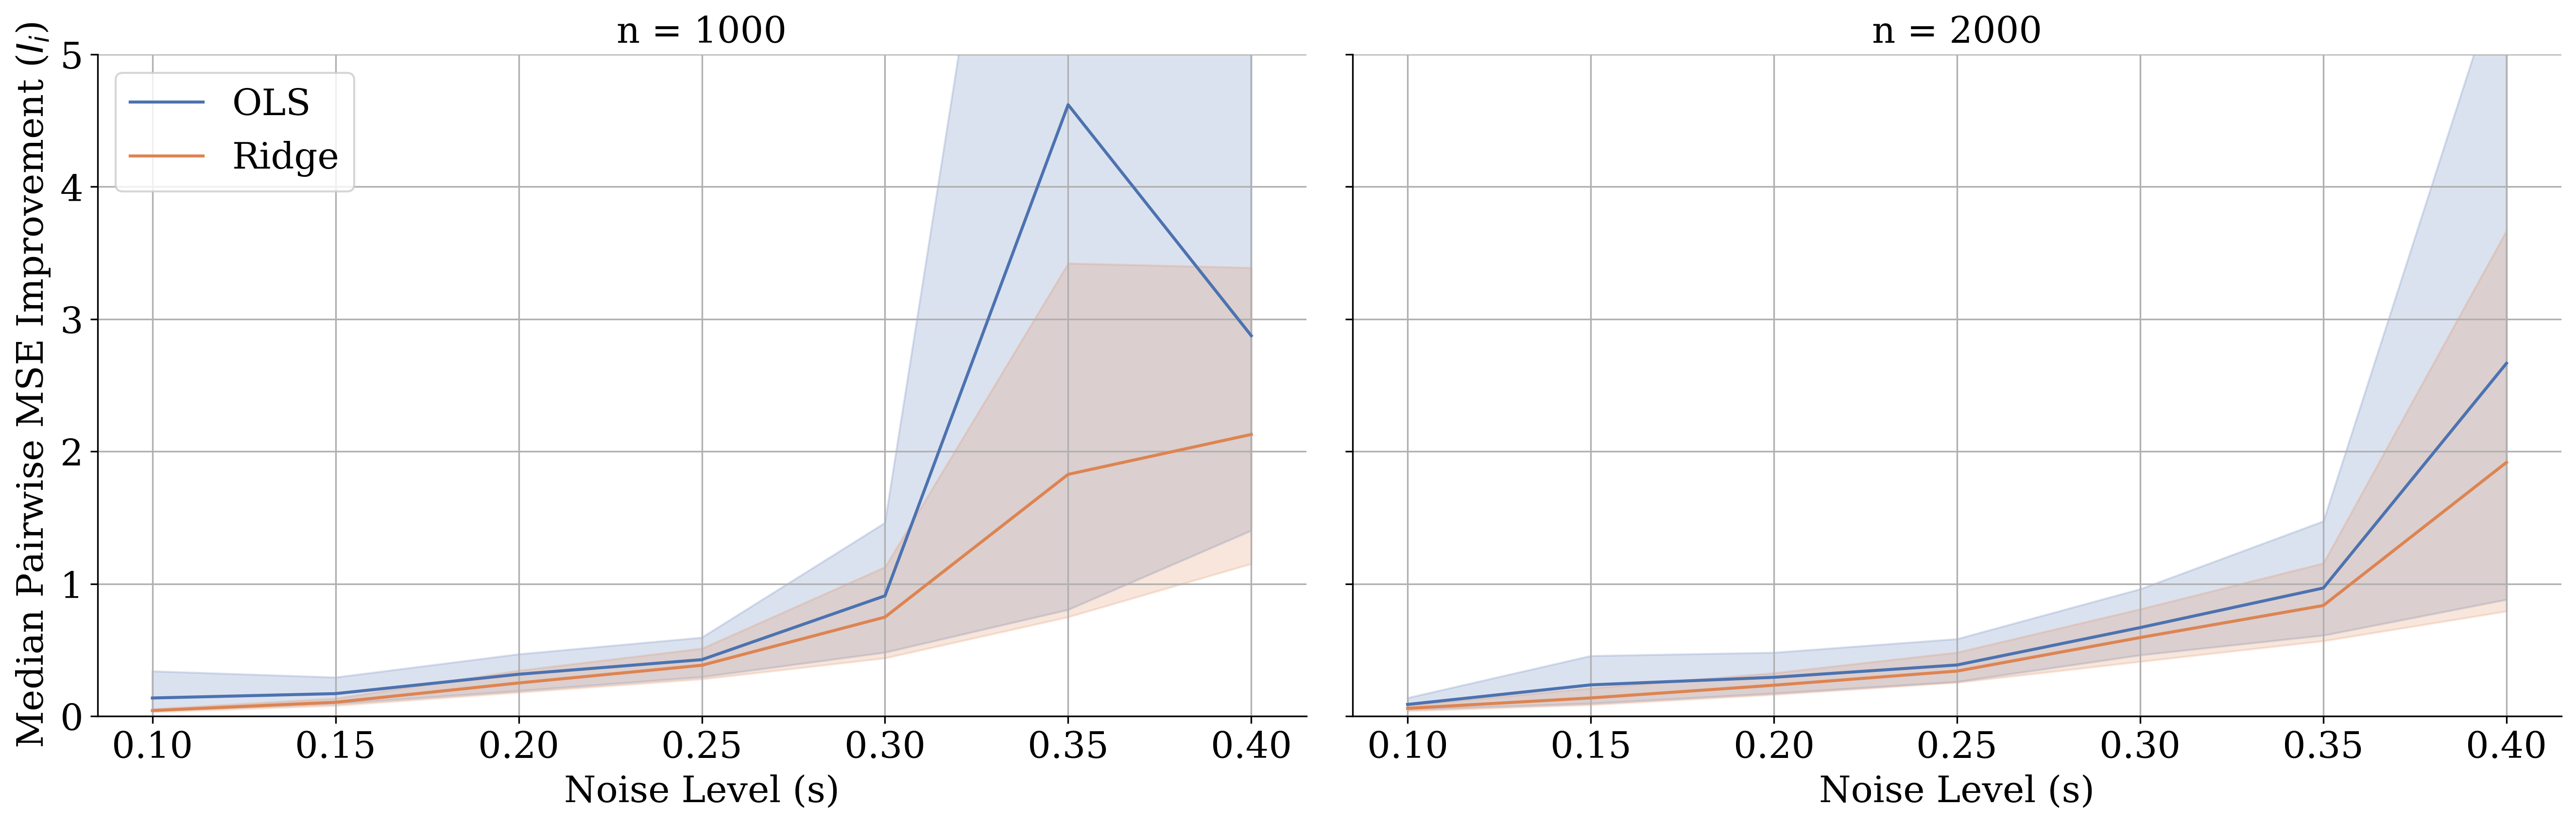

In [ ]:
# Detailed pairwise improvement plot for OLS and Ridge (in appendix)
data = df_agg2[df_agg2["method"].isin(["ols", "ridge"])]
data["method"] = data["method"].map({"ols": "OLS", "ridge": "Ridge"})
# data = df_agg2
# sns.set_style("whitegrid")
g = sns.FacetGrid(
    data, col="n", height=6, aspect=1.5, margin_titles=False, sharey=True, ylim=(0, 5)
)
g.map_dataframe(
    sns.lineplot,
    x="noise_level",
    hue="method",
    y="improvement",
    palette="deep",
)
for i, ax in enumerate(g.axes.flatten()):
    if i == 0:
        ax.legend()
        ax.set_ylabel("Median Pairwise MSE Improvement ($I_i$)")
    ax.set_xlabel("Noise Level (s)")
    ax.grid(True)

g.set_titles(col_template="n = {col_name}")
plt.savefig("plots/improvement_ols_ridge")
plt.show()

# ClusterSC (Lasso) weights F1 Analysis (in appendix)

In [7]:
def compute_f1_score(true_ids, pred_ids):
    true_set = set(true_ids)
    pred_set = set(pred_ids)

    true_positives = len(true_set.intersection(pred_set))
    false_positives = len(pred_set - true_set)
    false_negatives = len(true_set - pred_set)

    precision = (
        true_positives / (true_positives + false_positives)
        if (true_positives + false_positives) > 0
        else 0
    )
    recall = (
        true_positives / (true_positives + false_negatives)
        if (true_positives + false_negatives) > 0
        else 0
    )

    f1_score = (
        2 * (precision * recall) / (precision + recall)
        if (precision + recall) > 0
        else 0
    )

    return f1_score, precision, recall

In [8]:
df_lasso = df_results[df_results["method"] == "lasso"].copy()

In [9]:
df_lasso.head()

,target_id,bench_test,cluster_test,donor_ids,cluster_weights,bench_weights,noise_level,n_A,n_B,T,iteration,method
63000,0,0.026210,0.032789,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",[0. 0. 0. 0. 0...,[ 0. 0. 0. 0. ...,0.1,500,500,10,4,lasso
63001,1,0.028563,0.019036,"[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",[0. 0. 0. 0. 0...,[ 0. 0. 0. 0. ...,0.1,500,500,10,4,lasso
63002,2,0.045834,0.028820,"[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",[ 0. 0. 0. 0. ...,[ 0. 0. -0. 0. ...,0.1,500,500,10,4,lasso
63003,3,0.065729,0.024977,"[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",[0. 0. 0. 0. 0...,[ 0. 0. 0. 0. ...,0.1,500,500,10,4,lasso
63004,4,0.018490,0.014437,"[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",[0. 0. 0. 0. 0...,[ 0. 0. 0. 0. ...,0.1,500,500,10,4,lasso


In [ ]:
# NOTE: this will take a while to run and a lot of memory due to parsing weight strings into list objects
# Directly use our precomputed f1_lasso.csv below to skip this

df_lasso["cluster_weights"] = df_lasso["cluster_weights"].apply(json.loads)
df_lasso["bench_weights"] = df_lasso["bench_weights"].apply(json.loads)
df_lasso["donor_ids"] = df_lasso["donor_ids"].apply(json.loads)

# sanity check
print(df_lasso["bench_weights"].apply(len).unique())
all(
    df_lasso["donor_ids"].apply(len).unique()
    == df_lasso["cluster_weights"].apply(len).unique()
)

def process_row(row):
    true_ids = set(np.arange(row.n_A)) - {row.target_id}
    
    # lasso active weights after cluster
    nonzero_idxs = np.nonzero(row["cluster_weights"])[0]
    active_donor_ids = set(np.array(row["donor_ids"])[nonzero_idxs])
    _, cluster_lasso_precision, _ = compute_f1_score(
        true_ids, active_donor_ids
    )
    
    # lasso active weights no cluster
    _, bench_precision, _ = compute_f1_score(
        true_ids,
        set(np.nonzero(row["bench_weights"])[0]),
    )
    
    # selected donors by cluster
    cluster_f1, cluster_precision, cluster_recall = compute_f1_score(
        true_ids, set(row['donor_ids'])
    )
    
    return pd.Series({
        "cluster_lasso_precision": cluster_lasso_precision,
        "bench_precision": bench_precision,
        "cluster_f1": cluster_f1,
        "cluster_precision": cluster_precision,
        "cluster_recall": cluster_recall
    })

tqdm.pandas(desc="Processing rows") 
df_lasso[["cluster_lasso_precision", "bench_precision", "cluster_f1", "cluster_precision", "cluster_recall"]] = df_lasso.progress_apply(process_row, axis=1)
df_lasso.drop(columns=["donor_ids", "cluster_weights", "bench_weights"], inplace=True)
df_lasso.to_csv("results/f1_lasso.csv")

In [21]:
df_lasso = pd.read_csv("results/f1_lasso.csv", index_col=0)

In [22]:
df_lasso

,target_id,bench_test,cluster_test,noise_level,n_A,n_B,T,iteration,method,cluster_lasso_precision,bench_precision,cluster_f1,cluster_precision,cluster_recall
0,0,0.006025,0.002195,0.1,500,500,10,13,lasso,1.0,1.000000,0.851554,1.00000,0.741483
1,1,0.001647,0.001560,0.1,500,500,10,13,lasso,1.0,0.666667,0.848904,1.00000,0.737475
2,2,0.036482,0.010242,0.1,500,500,10,13,lasso,1.0,1.000000,0.848904,1.00000,0.737475
3,3,0.022064,0.023294,0.1,500,500,10,13,lasso,1.0,1.000000,0.848904,1.00000,0.737475
4,4,0.008380,0.000262,0.1,500,500,10,13,lasso,1.0,1.000000,0.851554,1.00000,0.741483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314995,295,0.235984,0.193771,0.4,1000,1000,10,98,lasso,1.0,0.666667,0.920223,0.85739,0.992993
314996,296,0.645759,0.033938,0.4,1000,1000,10,98,lasso,1.0,0.833333,0.920223,0.85739,0.992993
314997,297,1.050757,0.691686,0.4,1000,1000,10,98,lasso,1.0,0.600000,0.920223,0.85739,0.992993
314998,298,2.626778,0.033250,0.4,1000,1000,10,98,lasso,1.0,0.666667,0.920223,0.85739,0.992993


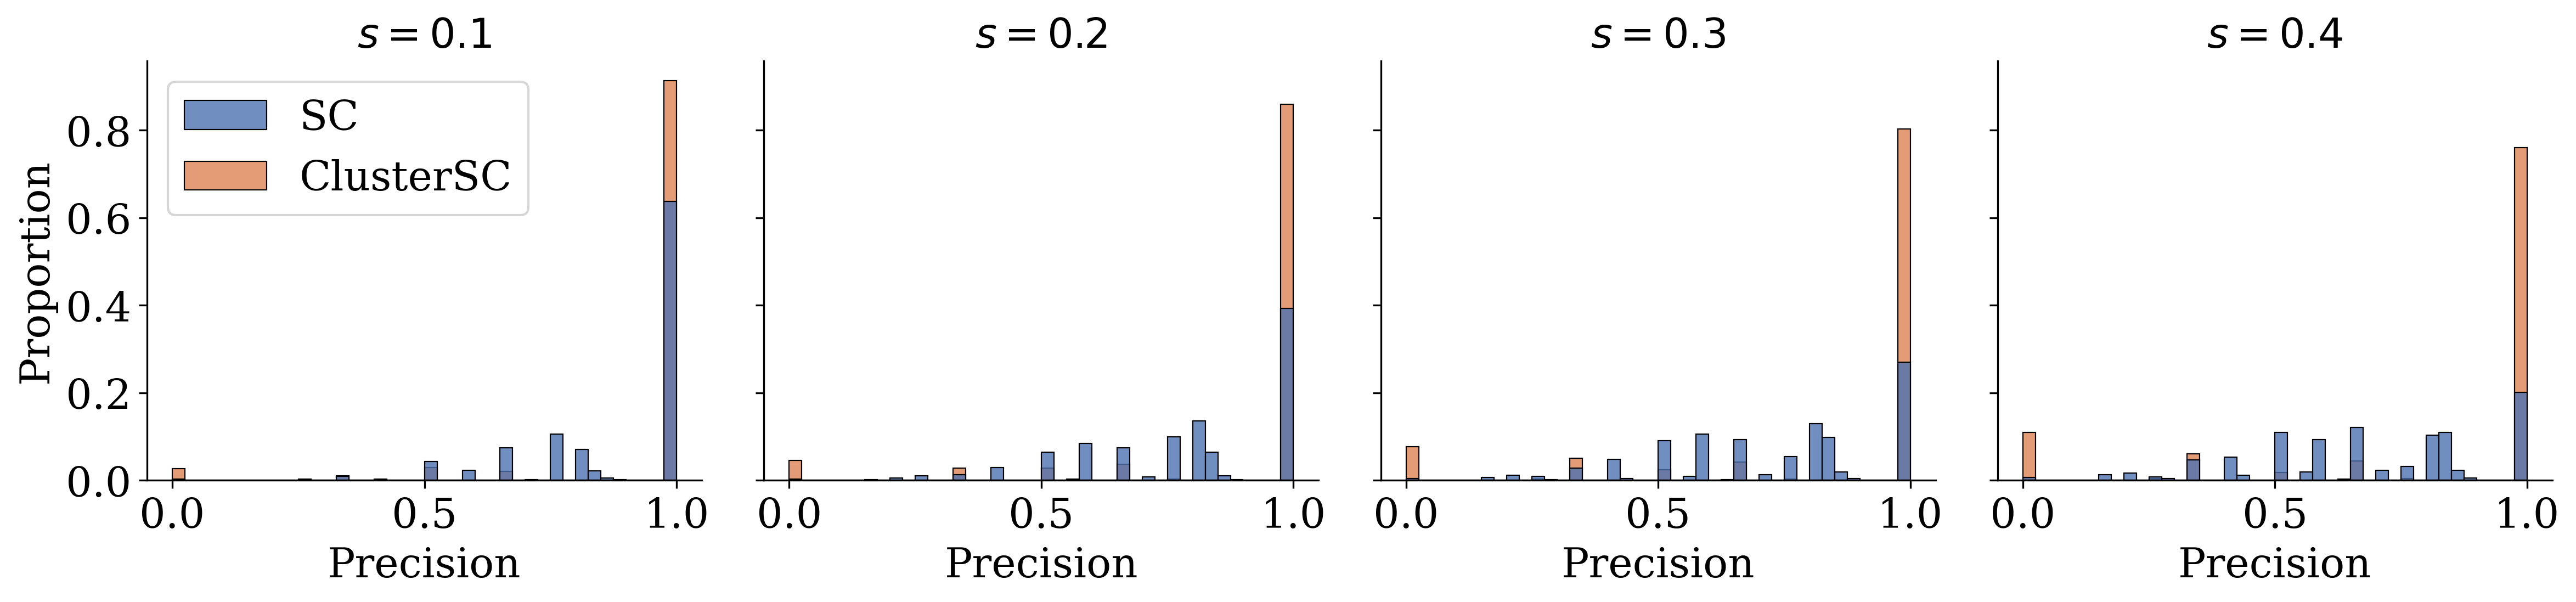

In [24]:
data = df_lasso[(df_lasso['n_A']==500)]
# data = df_lasso[(df_lasso['iteration']==0) & (df_lasso['n_A']==500)]
value_vars = ["cluster_lasso_precision", "bench_precision"]

df_melted = data.melt(id_vars, value_vars, var_name="type", value_name="Precision")
df_melted["type"] = df_melted["type"].map(
    {"bench_precision": "SC", "cluster_lasso_precision": "ClusterSC"}
)
df_melted = df_melted[df_melted["noise_level"].isin([0.1, 0.2, 0.3, 0.4])]
p = sns.color_palette("deep")
g = sns.FacetGrid(
    df_melted,
    col="noise_level",
    hue="type",
    margin_titles=True,
    height=4,
    aspect=1,
    palette=[p[1], p[0]]
)

# Map a histogram to each subplot
g.map(sns.histplot, "Precision", bins=np.arange(0, 1.01, 0.025), alpha=0.8, stat="proportion")

for ax in g.axes.flat:
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1])
    break
# Customize the plot
# g.add_legend(title="")
# g.set_axis_labels("Precision", "Count")
g.set_titles(col_template="$s={col_name}$", row_template="{row_name}")
plt.savefig("plots/lasso_precision_n=1000")
plt.show()

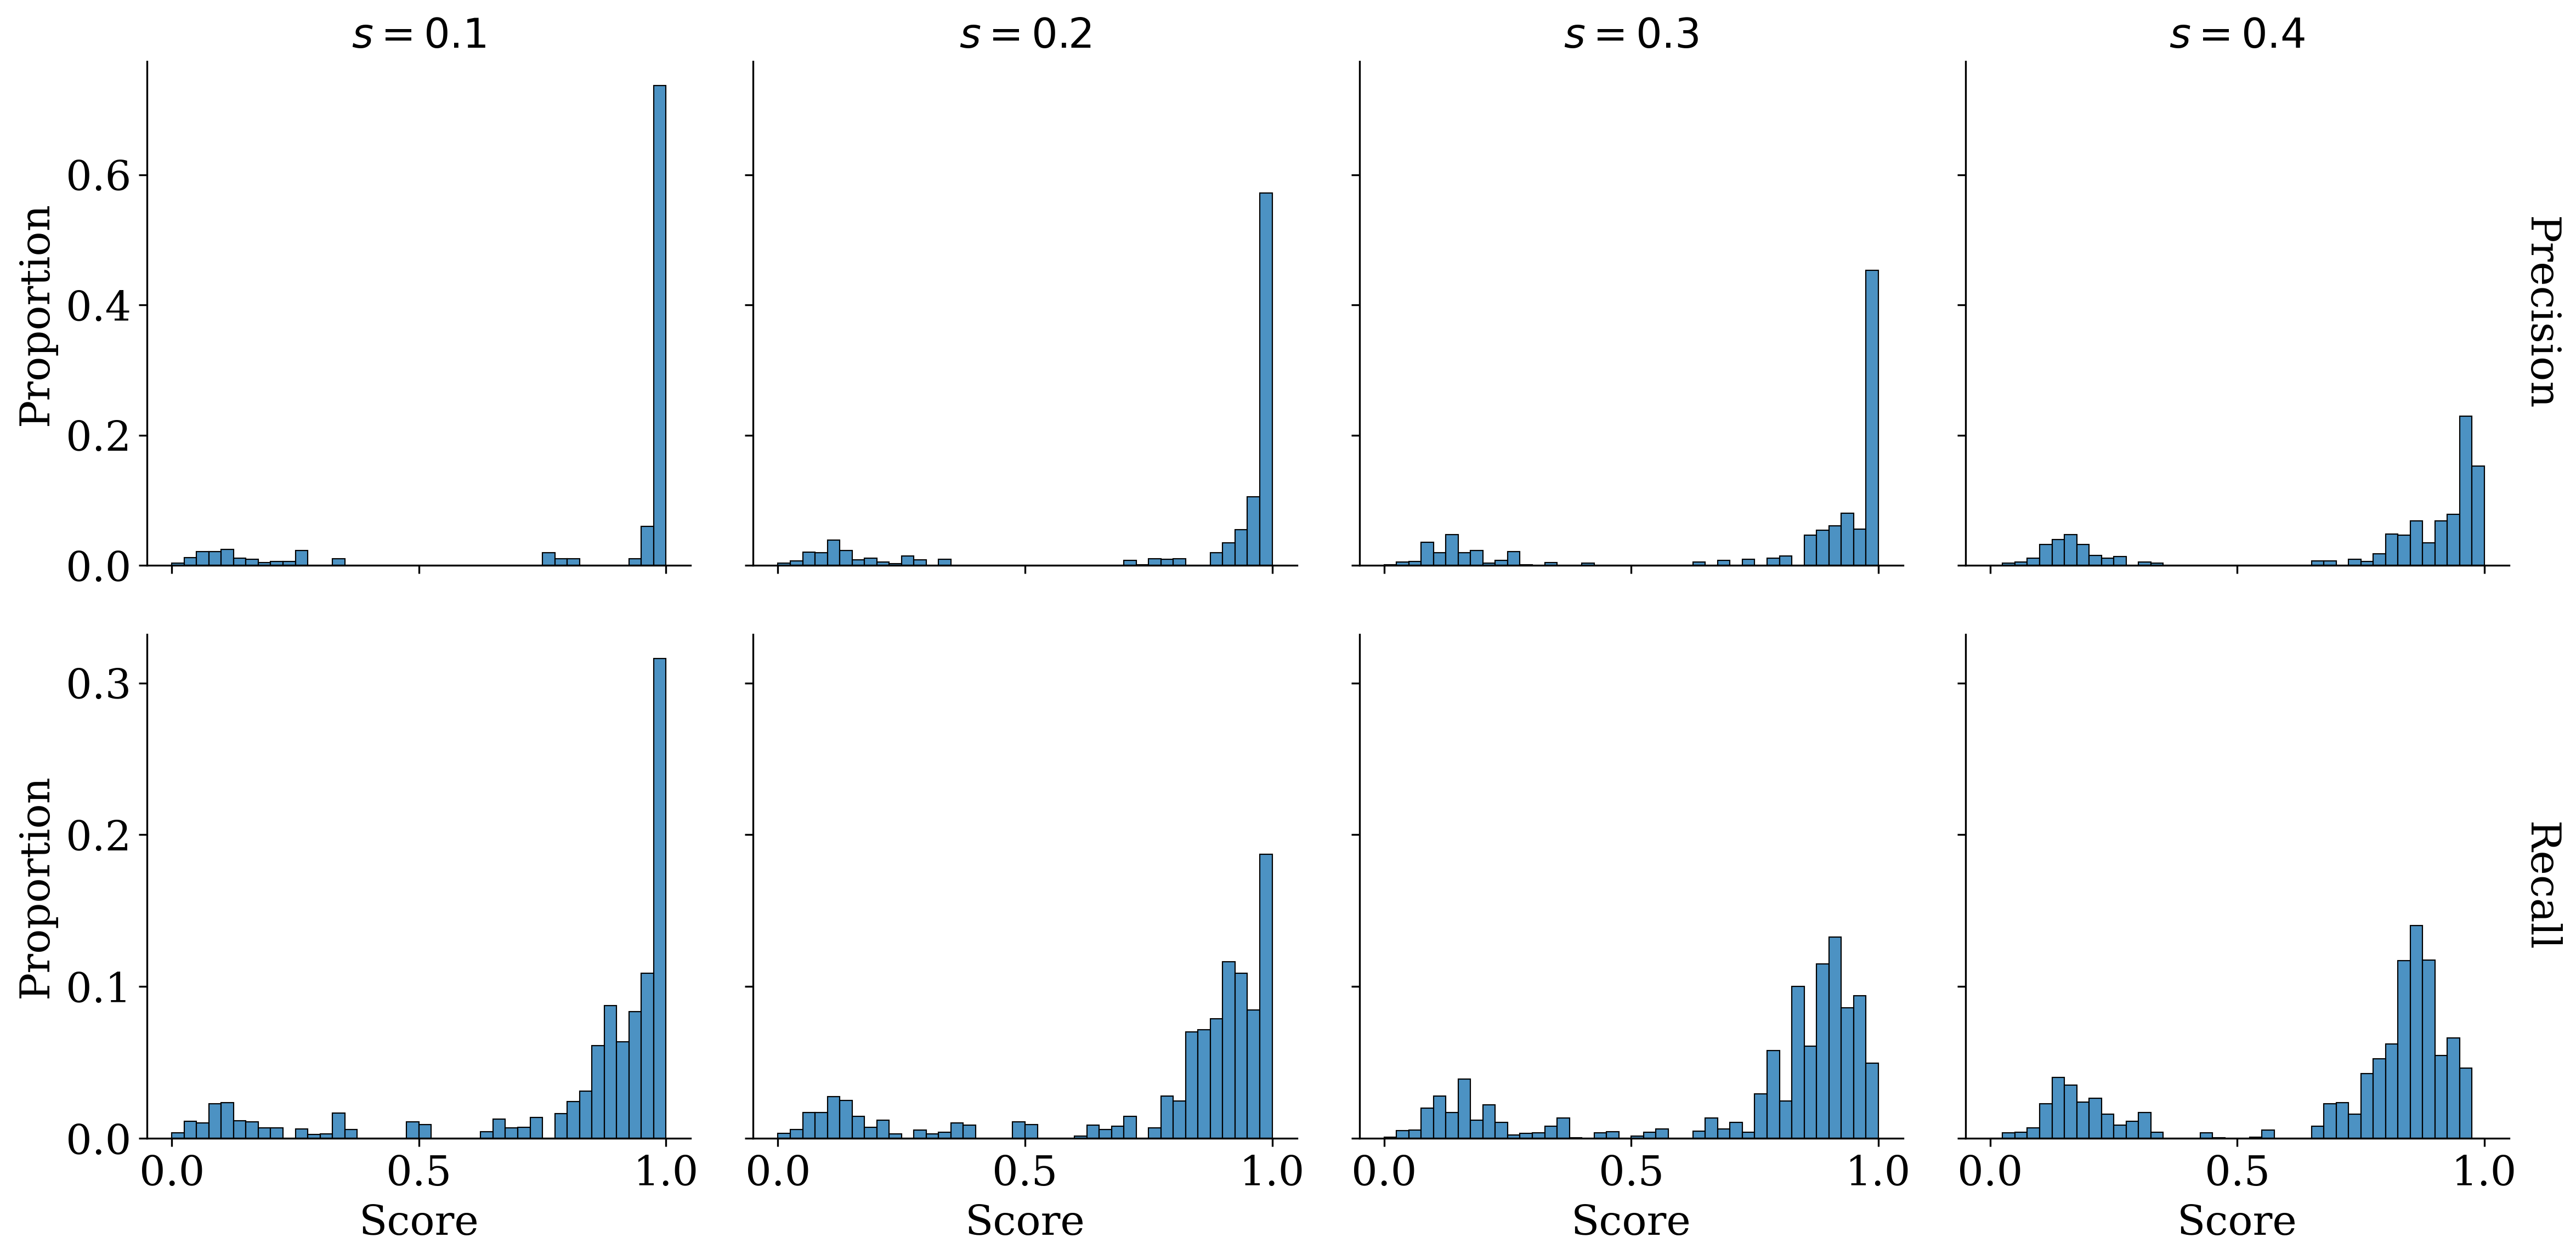

In [25]:
value_vars = ["cluster_precision", "cluster_recall"]
data = df_lasso[(df_lasso['n_A']==500)]
# data = df_lasso[(df_lasso['iteration']==0) & (df_lasso['n_A']==500)]

df_melted = data.melt(id_vars, value_vars, var_name="type", value_name="Score")
df_melted["type"] = df_melted["type"].map(
    {"cluster_recall": "Recall", "cluster_precision": "Precision"}
)
df_melted = df_melted[df_melted["noise_level"].isin([0.1, 0.2, 0.3, 0.4])]
p = sns.color_palette("deep")
g = sns.FacetGrid(
    df_melted,
    col="noise_level",
    row="type",
    margin_titles=True,
    height=4,
    aspect=1,
    # palette=[p[1], p[0]]
    palette=p,
    sharey='row'
)

# Map a histogram to each subplot
g.map(sns.histplot, "Score", bins=np.arange(0, 1.01, 0.025), alpha=0.8, stat="proportion")

# Customize the plot
# g.add_legend(title="")
# g.set_axis_labels("Precision", "Count")
g.set_titles(col_template="$s={col_name}$", row_template="{row_name}")
plt.savefig("plots/cluster_recall_precision_n=1000")
plt.show()